# Understanding the Business Problem
In today’s data-driven job market, salary transparency and prediction are valuable both to job seekers and organizations. This project focuses on uncovering key patterns in job salary data and building a predictive model. The core business questions we aim to address are:

- #### Role-Based Salary Differences:
    - How does the salary vary across different job roles like Data Scientist, Software Engineer, or DevOps Engineer?
- #### Company Size Impact:
    - Does the size of a company influence salary levels?
- #### Location-Based Variation:
    - Are there notable differences in salaries based on location (e.g., San Francisco vs. Austin vs. New York)?
- #### Salary Prediction Model:
    - Can we build a robust machine learning model to predict salary using job-related attributes?

Together, these objectives help in understanding salary dynamics and in building a tool that supports compensation planning or career decision-making.



In [1]:
# Importing some required and necessary modules
#  for data handling
import pandas as pd
import numpy as np
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for handling warnings (if any found later on)
import warnings
warnings.filterwarnings('ignore')
# Setting a default plot style for all charts for EDA
sns.set(style="whitegrid")


In [2]:
# Loading the dataset
df = pd.read_csv('glassdoor_jobs.csv')

In [3]:
# GLancing at the dataset by displaying the first 5 rows of the dataset
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
# checking the number of rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 956 rows and 15 columns.


In [5]:
# Getting basic informatiuon from the dataset such as Column names, datatypes, and non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [6]:
# Checking for total number of duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
# Count unique values and show examples for each column, to better understand if any ambiguous value is present or not
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Sample values: {df[col].unique()[:5]}")


Column: Unnamed: 0
Unique values: 956
Sample values: [0 1 2 3 4]

Column: Job Title
Unique values: 328
Sample values: ['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst']

Column: Salary Estimate
Unique values: 417
Sample values: ['$53K-$91K (Glassdoor est.)' '$63K-$112K (Glassdoor est.)'
 '$80K-$90K (Glassdoor est.)' '$56K-$97K (Glassdoor est.)'
 '$86K-$143K (Glassdoor est.)']

Column: Job Description
Unique values: 596
Sample values: ['Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoi

In [8]:
# Removing rows with '-1' salary (indicates missing data)
df = df[df['Salary Estimate'] != '-1']

In [9]:
# Removing text and extracting salary range
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '').str.replace('$', '')
df['Salary Estimate'] = df['Salary Estimate'].str.split('(').str[0]

In [10]:
# Handling 'per hour' or 'employer provided' labels
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided' in x.lower() else 0)


In [11]:
# Extracting min, max, avg salary for future use
salary = df['Salary Estimate'].str.extract(r'(\d+)\s*-\s*(\d+)')
df['min_salary'] = salary[0].astype(int)
df['max_salary'] = salary[1].astype(int)
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

In [12]:
# Removing rating from company name if appended
df['Company Name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-3], axis=1)


In [13]:
# Splitting location into state and city for better understanding and future use
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())
df['hq_state'] = df['Headquarters'].apply(lambda x: x.split(',')[-1].strip())

# Adding a new feature: Is job in same state as HQ?
# may help to predict salary in future use
df['same_state_as_hq'] = (df['job_state'] == df['hq_state']).astype(int)


In [14]:
# Marking missing competitors
df['has_competitor_info'] = df['Competitors'].apply(lambda x: 0 if x == '-1' else 1)

# Simplifying the revenue into ordinal categories
df['Revenue'] = df['Revenue'].replace('Unknown / Non-Applicable', np.nan)

In [15]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,job_state,hq_state,same_state_as_hq,has_competitor_info
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,-1,0,0,53,91,72.0,NM,CA,0,0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,-1,0,0,63,112,87.5,MD,MD,1,0
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,-1,0,0,80,90,85.0,FL,FL,1,0
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,WA,WA,1,1
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n,"New York, NY","New York, NY",51 to 200 employees,1998,...,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,NY,NY,1,1


In [16]:
df.shape

(742, 24)

In [17]:
df.isna().sum()


Unnamed: 0               0
Job Title                0
Salary Estimate          0
Job Description          0
Rating                   0
Company Name             0
Location                 0
Headquarters             0
Size                     0
Founded                  0
Type of ownership        0
Industry                 0
Sector                   0
Revenue                203
Competitors              0
hourly                   0
employer_provided        0
min_salary               0
max_salary               0
avg_salary               0
job_state                0
hq_state                 0
same_state_as_hq         0
has_competitor_info      0
dtype: int64

In [18]:
# EDA (Exploratory data analysis)
# Plotting min. 15 meaningful charts to understand relationships between various variables

In [19]:
# Univariate charts

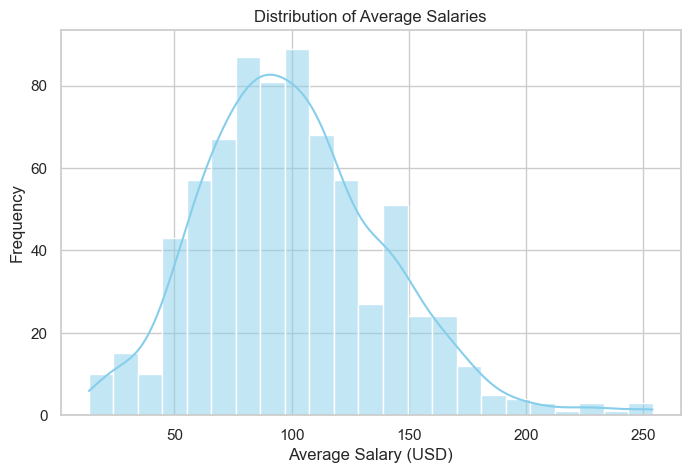

In [20]:
# Chart 1 – Distribution of Average Salary
plt.figure(figsize=(8,5))
sns.histplot(df['avg_salary'], kde=True, color='skyblue')
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Frequency')
plt.show()


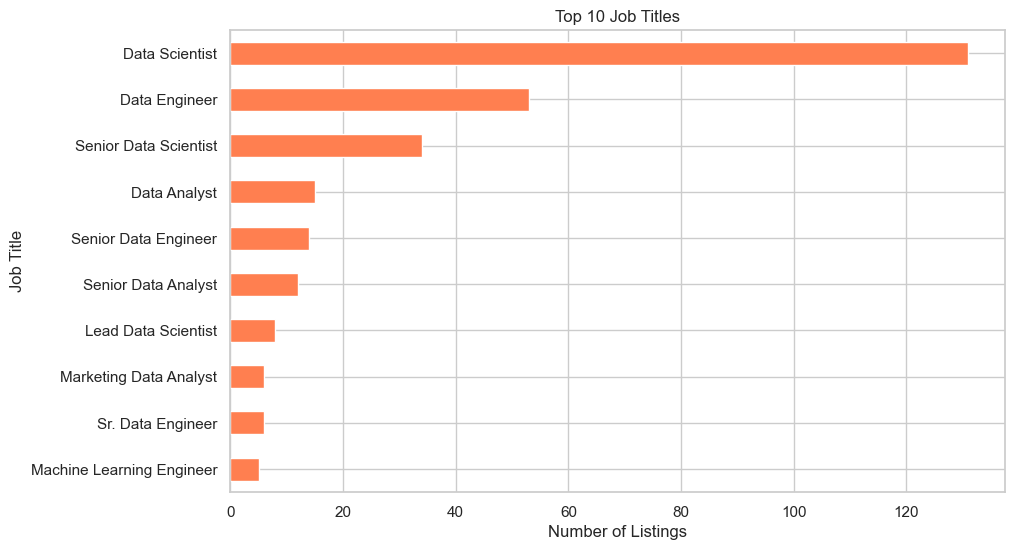

In [21]:
# Chart 2 – Job Title Frequency

plt.figure(figsize=(10,6))
df['Job Title'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Job Titles')
plt.xlabel('Number of Listings')
plt.ylabel('Job Title')
plt.gca().invert_yaxis()
plt.show()


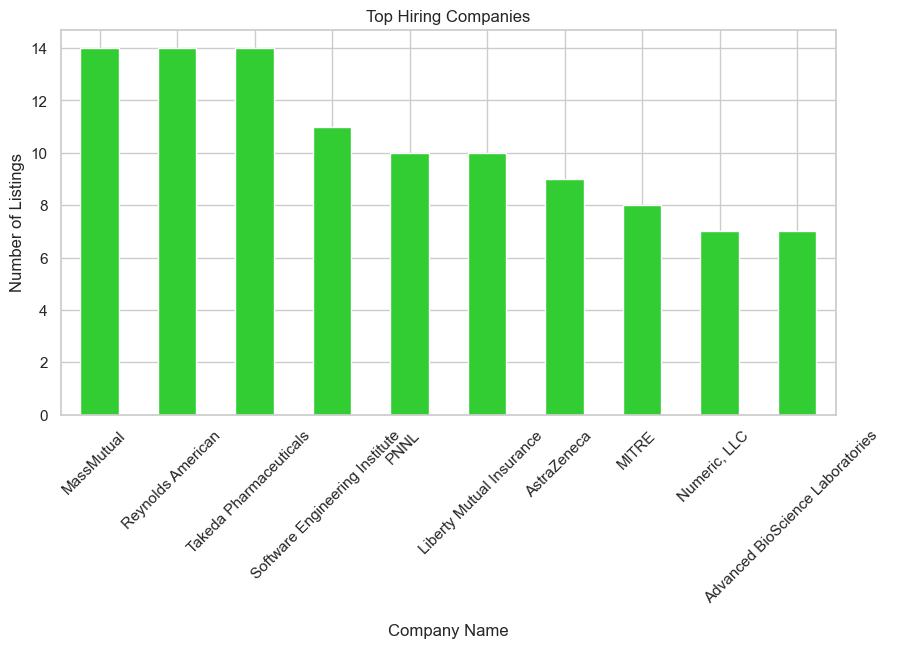

In [22]:
 # Chart 3 – Company Frequency
plt.figure(figsize=(10,5))
df['Company Name'].value_counts().head(10).plot(kind='bar', color='limegreen')
plt.title('Top Hiring Companies')
plt.xlabel('Company Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


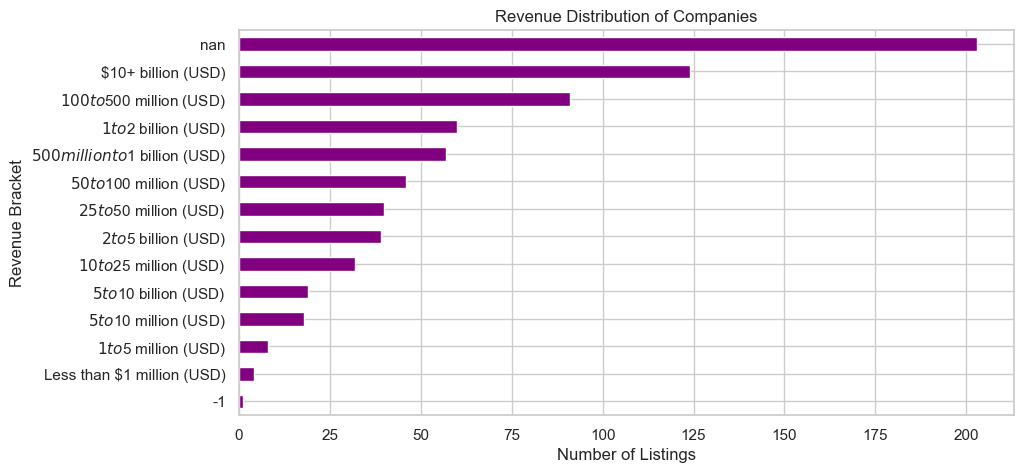

In [23]:
# Chart 4 – Revenue Categories
plt.figure(figsize=(10,5))
df['Revenue'].value_counts(dropna=False).plot(kind='barh', color='purple')
plt.title('Revenue Distribution of Companies')
plt.xlabel('Number of Listings')
plt.ylabel('Revenue Bracket')
plt.gca().invert_yaxis()
plt.show()



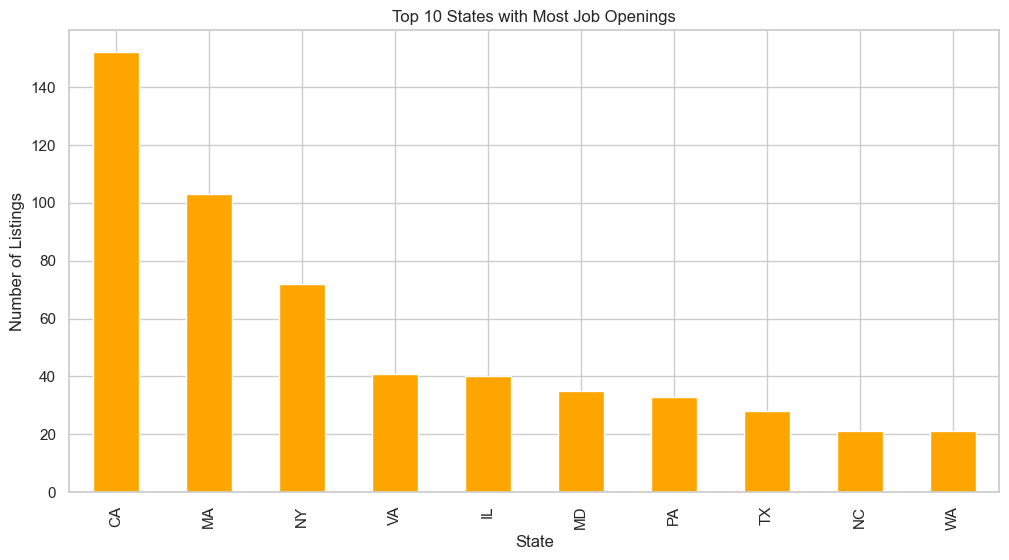

In [24]:
# Chart 5 – Job States Frequency
plt.figure(figsize=(12,6))
df['job_state'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 States with Most Job Openings')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.show()


In [25]:
# Bivariate charts

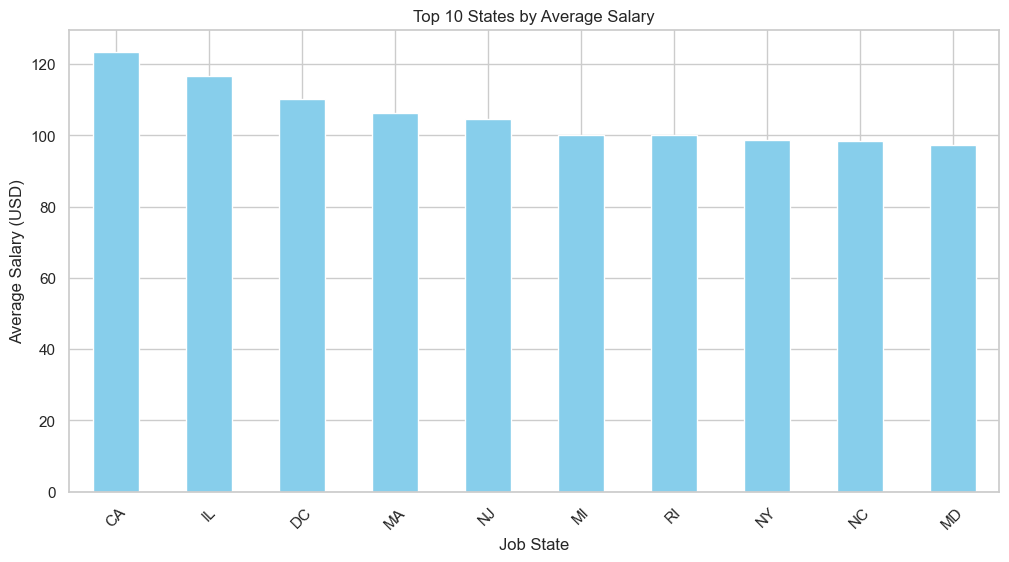

In [26]:
# Chart 6 – Average Salary by Job State
# This analysis answers Problem Statement Point 3 by examining how average salaries differ across U.S. states. 
# California and Illionis are among the top-paying locations, aligning with expectations based on the tech industry's geographic concentration.
plt.figure(figsize=(12,6))
state_salary = df.groupby('job_state')['avg_salary'].mean().sort_values(ascending=False).head(10)
state_salary.plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Average Salary')
plt.xlabel('Job State')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()


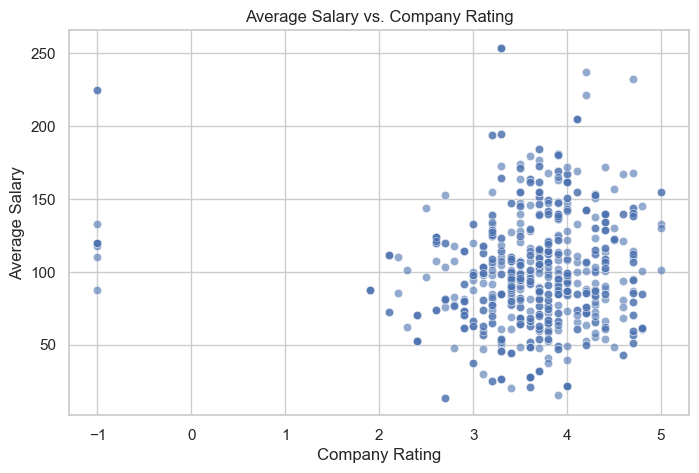

In [27]:
# Chart 7 – Salary vs. Company Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='avg_salary', data=df, alpha=0.6)
plt.title('Average Salary vs. Company Rating')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.show()


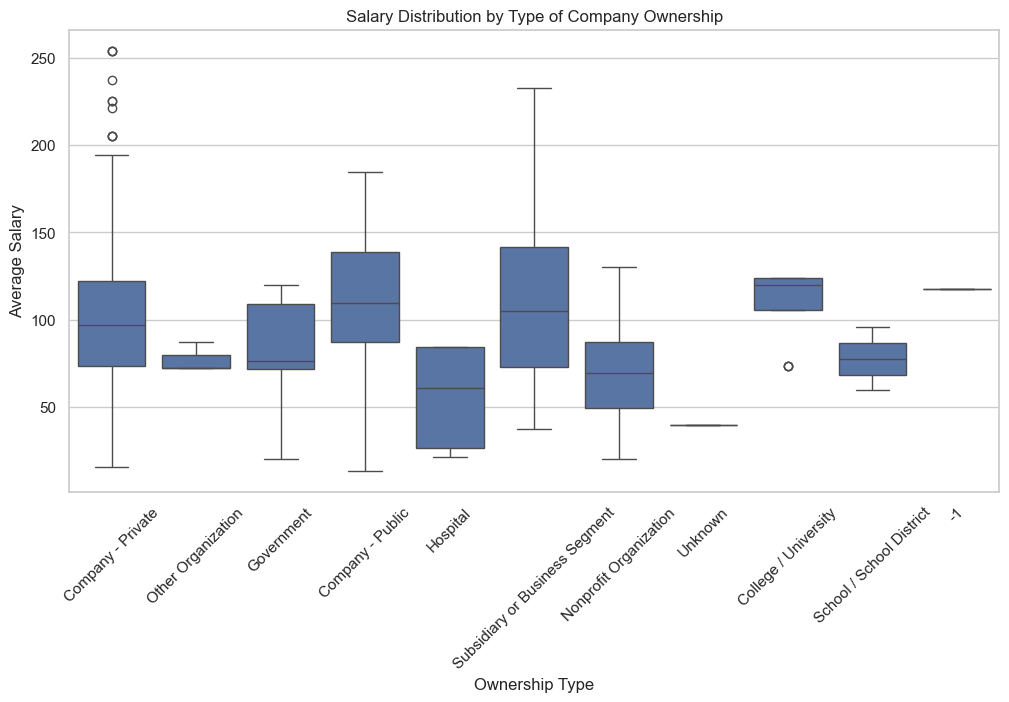

In [28]:
# Chart 8 – Boxplot: Salary by Company Ownership
plt.figure(figsize=(12,6))
sns.boxplot(x='Type of ownership', y='avg_salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Type of Company Ownership')
plt.xlabel('Ownership Type')
plt.ylabel('Average Salary')
plt.show()


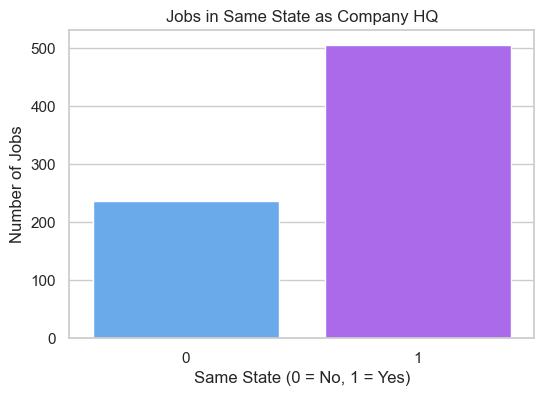

In [29]:
# Chart 9 – Countplot: Same-State Job vs HQ
plt.figure(figsize=(6,4))
sns.countplot(x='same_state_as_hq', data=df, palette='cool')
plt.title('Jobs in Same State as Company HQ')
plt.xlabel('Same State (0 = No, 1 = Yes)')
plt.ylabel('Number of Jobs')
plt.show()


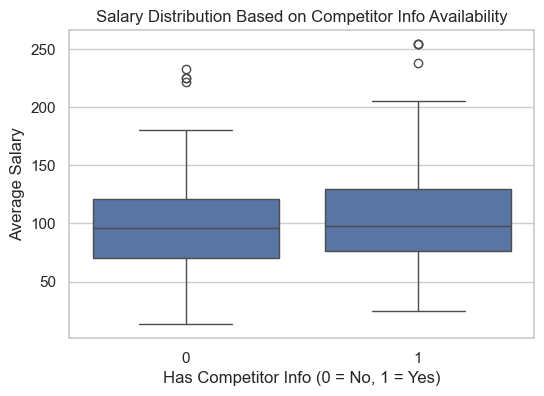

In [30]:
# Chart 10 – Salary by Competitor Info
plt.figure(figsize=(6,4))
sns.boxplot(x='has_competitor_info', y='avg_salary', data=df)
plt.title('Salary Distribution Based on Competitor Info Availability')
plt.xlabel('Has Competitor Info (0 = No, 1 = Yes)')
plt.ylabel('Average Salary')
plt.show()


In [31]:
# Multivariate charts

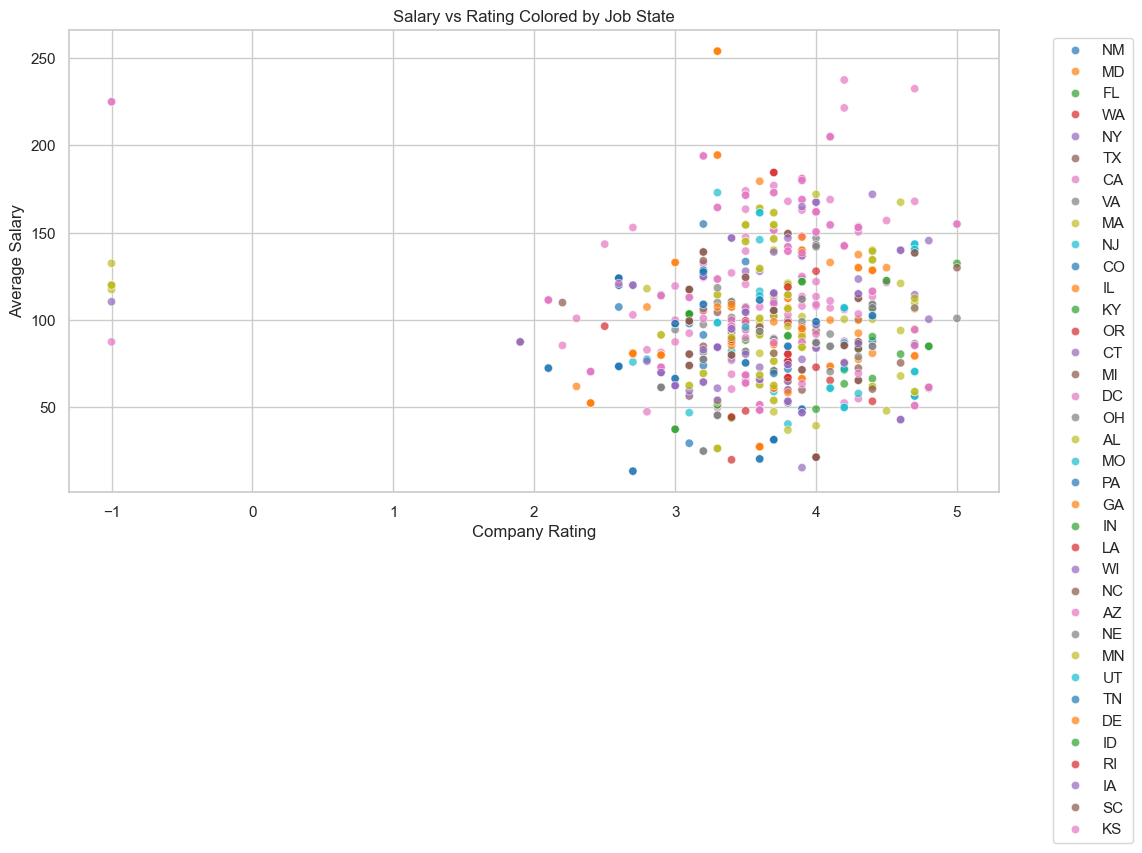

In [32]:
 # Chart 11 – Salary vs. Rating Across Job States
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Rating', y='avg_salary', hue='job_state', alpha=0.7, palette='tab10')
plt.title('Salary vs Rating Colored by Job State')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


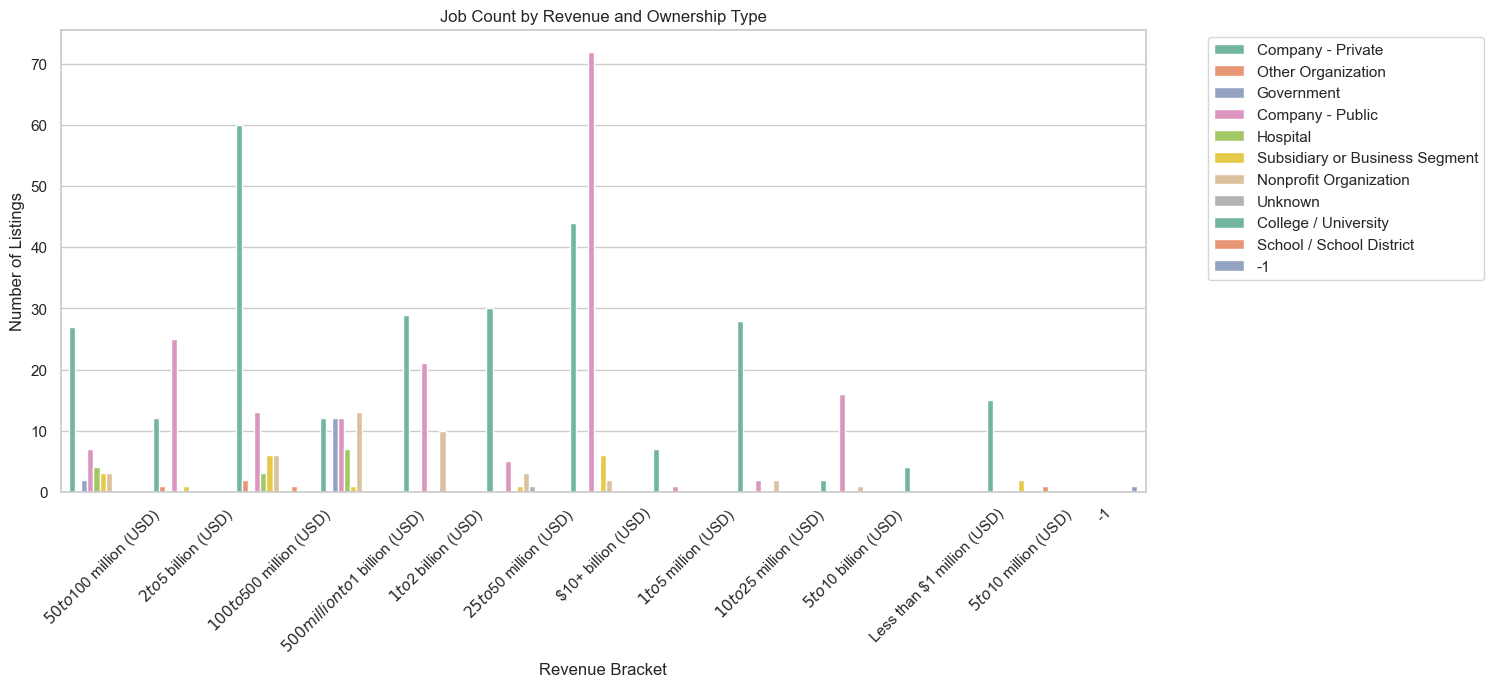

In [33]:
# Chart 12 – Count of Jobs by Revenue and Ownership
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Revenue', hue='Type of ownership', palette='Set2')
plt.title('Job Count by Revenue and Ownership Type')
plt.xlabel('Revenue Bracket')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

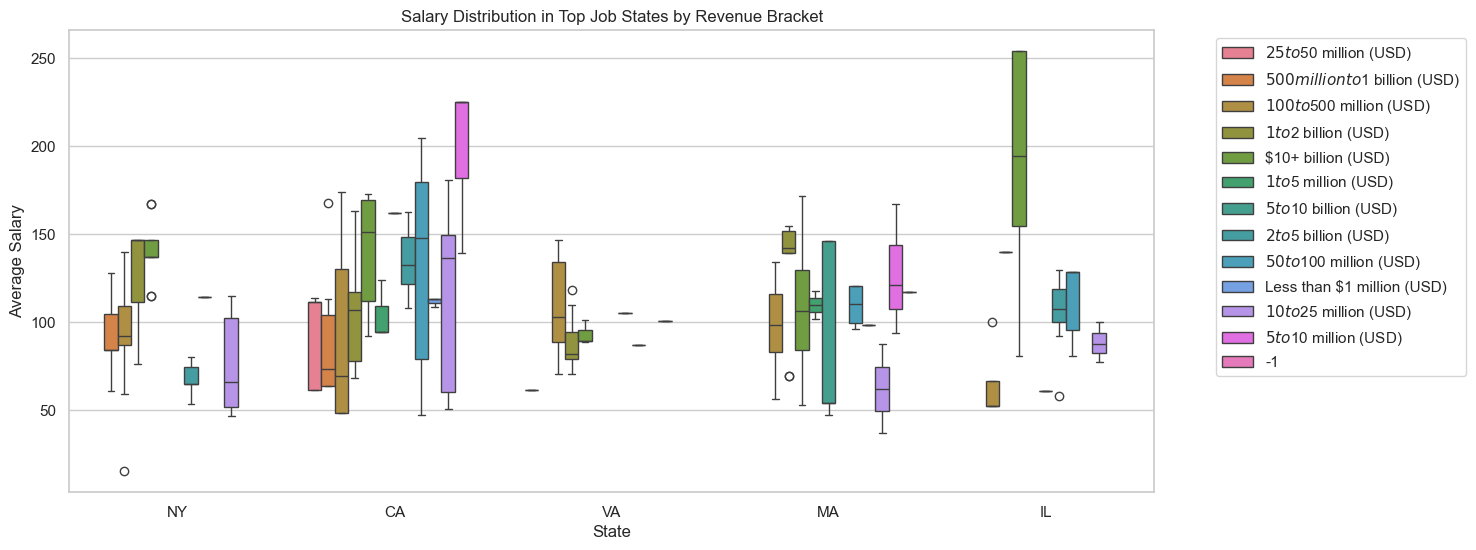

In [34]:
# Chart 13 – Boxplot of Salary vs. State and Revenue
plt.figure(figsize=(14,6))
top_states = df['job_state'].value_counts().head(5).index
sns.boxplot(data=df[df['job_state'].isin(top_states)], x='job_state', y='avg_salary', hue='Revenue')
plt.title('Salary Distribution in Top Job States by Revenue Bracket')
plt.xlabel('State')
plt.ylabel('Average Salary')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


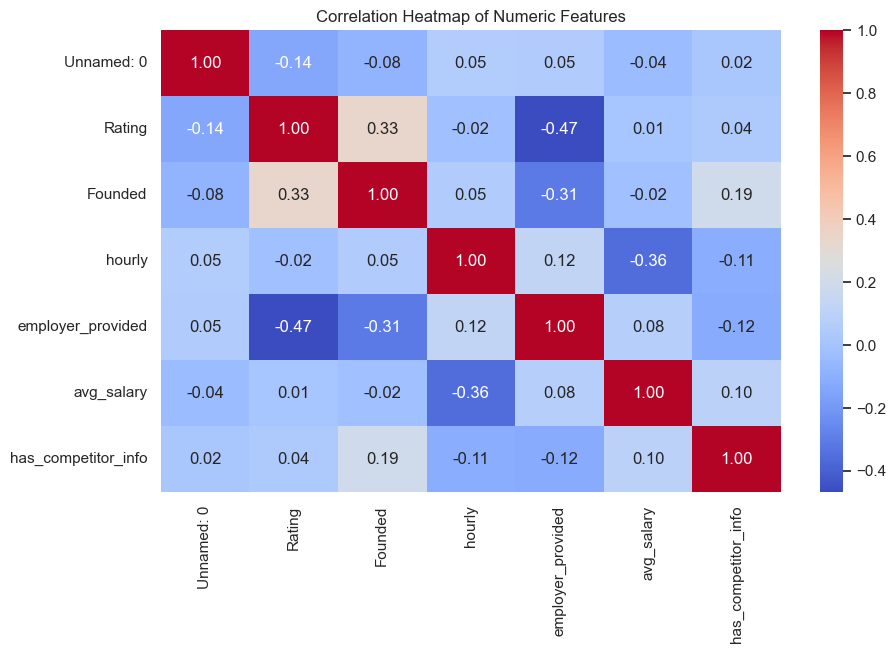

In [35]:
#  Chart 14 – Heatmap: Correlation Between All Numeric Features
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


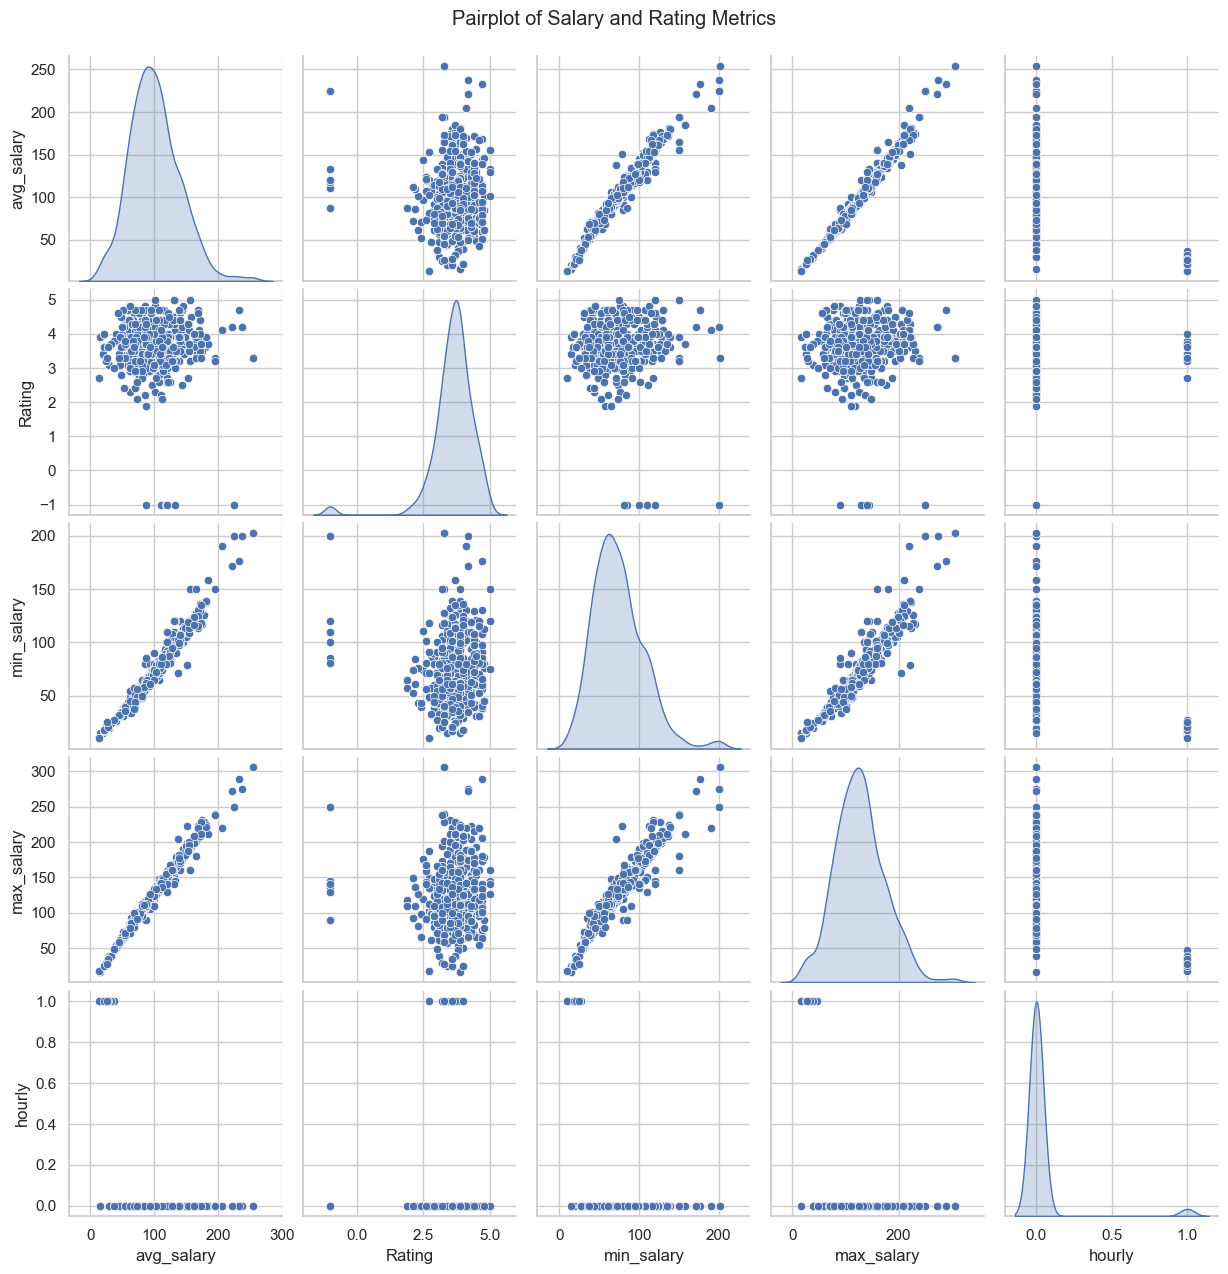

In [36]:
# Chart 15 – Pairplot of Key Features
sns.pairplot(df[['avg_salary', 'Rating', 'min_salary', 'max_salary', 'hourly']], diag_kind='kde')
plt.suptitle('Pairplot of Salary and Rating Metrics', y=1.02)
plt.show()


In [37]:
# Hypothesis testing

In [38]:
# Hypothesis 1: “The average salary in California is significantly higher than in other states.”
# Hypothesis Setup:
# H₀ (Null): Mean salary in California = Mean salary in other states
# H₁ (Alternate): Mean salary in California > Mean salary in other states

In [39]:
from scipy.stats import ttest_ind

california_salaries = df[df['job_state'] == 'CA']['avg_salary']
other_salaries = df[df['job_state'] != 'CA']['avg_salary']

t_stat, p_value = ttest_ind(california_salaries, other_salaries, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject H₀: California salaries are significantly higher.")
else:
    print("Fail to Reject H₀: No significant salary difference.")


T-Statistic: 7.612755641782133
P-Value: 9.384212253756006e-13
Reject H₀: California salaries are significantly higher.


In [40]:
# Hypothesis 2: “Companies with a competitor list available tend to offer higher salaries.”
# Hypothesis Setup:
# H₀: Salaries are the same regardless of competitor info
# H₁: Companies with competitor info pay more

In [41]:
comp_salaries = df[df['has_competitor_info'] == 1]['avg_salary']
no_comp_salaries = df[df['has_competitor_info'] == 0]['avg_salary']

t_stat, p_value = ttest_ind(comp_salaries, no_comp_salaries, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject H₀: Companies with competitor info offer higher salaries.")
else:
    print("Fail to Reject H₀: No salary difference due to competitor info.")


T-Statistic: 2.6703307846577897
P-Value: 0.007797774565484697
Reject H₀: Companies with competitor info offer higher salaries.


In [42]:
#  Hypothesis 3: “There is a significant association between company ownership type and job location being the same as HQ.”
# Hypothesis Setup:
# H₀: Job location and ownership type are independent
# H₁: They are dependent

In [43]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Type of ownership'], df['same_state_as_hq'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject H₀: There is an association between ownership and job-HQ location.")
else:
    print("Fail to Reject H₀: No significant association.")


Chi2 Statistic: 60.04198998213773
P-Value: 3.558594241306817e-09
Reject H₀: There is an association between ownership and job-HQ location.


In [44]:
# Feature engineering and data pre-processing

In [45]:

print("Missing values:\n", df.isnull().sum())


Missing values:
 Unnamed: 0               0
Job Title                0
Salary Estimate          0
Job Description          0
Rating                   0
Company Name             0
Location                 0
Headquarters             0
Size                     0
Founded                  0
Type of ownership        0
Industry                 0
Sector                   0
Revenue                203
Competitors              0
hourly                   0
employer_provided        0
min_salary               0
max_salary               0
avg_salary               0
job_state                0
hq_state                 0
same_state_as_hq         0
has_competitor_info      0
dtype: int64


In [46]:
df['Competitors'] = df['Competitors'].replace('-1', np.nan)


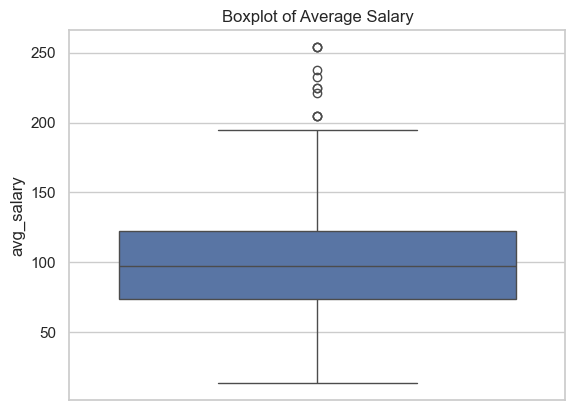

In [47]:
#  plotting to see if there are any extreme outliers that are too be removed
sns.boxplot(df['avg_salary'])
plt.title("Boxplot of Average Salary")
plt.show()


In [48]:
# removing the outliers by capping the data
q1 = df['avg_salary'].quantile(0.01)
q3 = df['avg_salary'].quantile(0.99)
df = df[(df['avg_salary'] >= q1) & (df['avg_salary'] <= q3)]


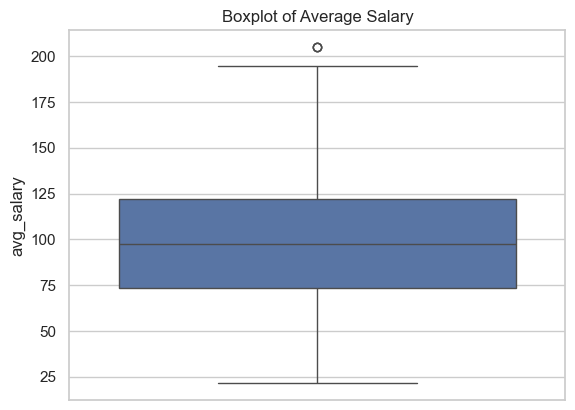

In [49]:
# plotting again to see the situation of outliers after capping them
sns.boxplot(df['avg_salary'])
plt.title("Boxplot of Average Salary")
plt.show()


In [50]:
#  label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

# List of columns to encode (drop text-heavy ones for now)
categorical_cols = ['Type of ownership', 'Revenue', 'Sector', 'Industry', 'job_state']

for col in categorical_cols:
    df[col] = df[col].astype(str)  # in case of NaNs
    df[col] = LabelEncoder().fit_transform(df[col])


In [51]:
import re
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['cleaned_desc'] = df['Job Description'].apply(clean_text)


In [52]:
# Feature manipulation and selection

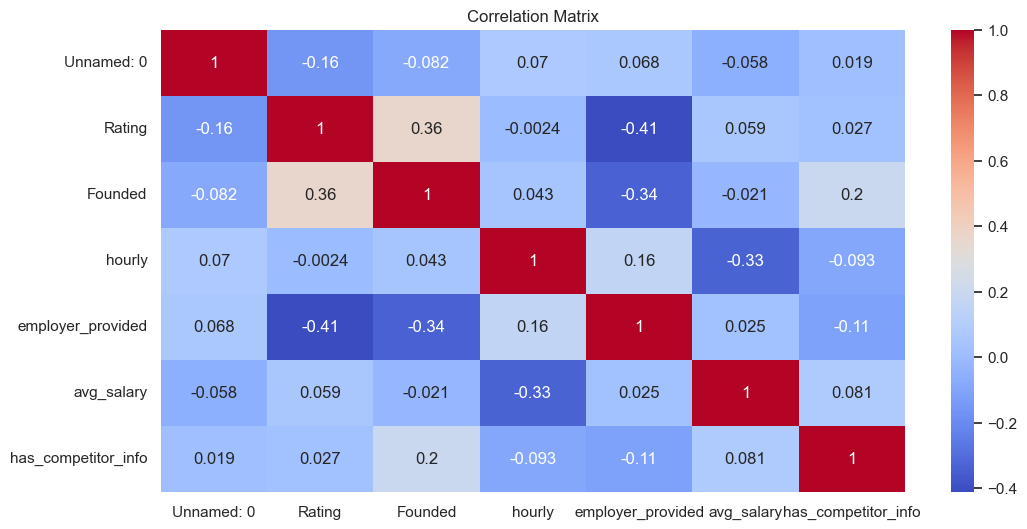

In [53]:
# heatmap to check correlation between different columns
plt.figure(figsize=(12, 6))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


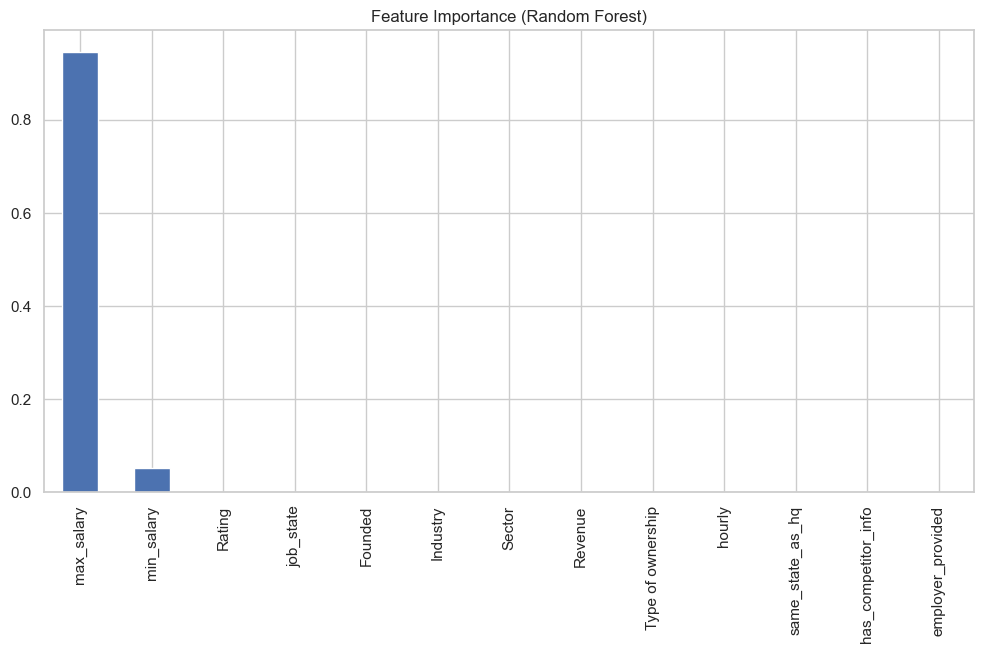

In [54]:
# splitting data to do a quick check on feature relevance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


y = df['avg_salary']
# Dropping non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
# removing any columns that might have contribute to leaking in the test dataset
X = df.drop(non_numeric_cols + ['Unnamed: 0', 'avg_salary', 'Job Description', 'cleaned_desc'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title="Feature Importance (Random Forest)")
plt.show()


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 955
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           728 non-null    int64  
 1   Job Title            728 non-null    object 
 2   Salary Estimate      728 non-null    object 
 3   Job Description      728 non-null    object 
 4   Rating               728 non-null    float64
 5   Company Name         728 non-null    object 
 6   Location             728 non-null    object 
 7   Headquarters         728 non-null    object 
 8   Size                 728 non-null    object 
 9   Founded              728 non-null    int64  
 10  Type of ownership    728 non-null    int32  
 11  Industry             728 non-null    int32  
 12  Sector               728 non-null    int32  
 13  Revenue              728 non-null    int32  
 14  Competitors          278 non-null    object 
 15  hourly               728 non-null    int64  


In [56]:
# Checking skewness of numerical features
skewness = df.select_dtypes(include=['int32','int64', 'float64']).skew().sort_values(ascending=False)
print(skewness)


employer_provided      6.763341
hourly                 5.957245
Type of ownership      2.126610
min_salary             0.653540
Industry               0.526902
has_competitor_info    0.487300
avg_salary             0.331631
Sector                 0.220692
max_salary             0.206728
Revenue                0.132468
job_state              0.066899
Unnamed: 0            -0.001084
same_state_as_hq      -0.793510
Rating                -2.708276
Founded               -3.355290
dtype: float64


In [57]:
#  Data scaling
# Only for the non-tree models, like linear regressor that requires scaling
from sklearn.preprocessing import StandardScaler

scale_cols = ['min_salary', 'max_salary', 'avg_salary', 'Rating', 'Founded']

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[scale_cols])

# Adding scaled columns back to the dataframe
for i, col in enumerate(scale_cols):
    df[f'{col}_scaled'] = scaled_values[:, i]


In [58]:
# Data splitting
# Splitting again cleanly and storing it for modelling
from sklearn.model_selection import train_test_split

# Dropping non-numeric/object cols we won’t use for modeling
leaky_cols = [
    'Salary Estimate',  # raw salary
    'min_salary', 'max_salary', 'avg_salary',  # original salary columns
    'min_salary_scaled', 'max_salary_scaled', 'avg_salary_scaled',  # transformed salary
    'Size'  # acts like a proxy for salary
]

# Defining target and features
X = df.drop(columns=leaky_cols, errors='ignore')
target = df['avg_salary']

X = pd.get_dummies(X, drop_first=True) 
y= target


# Final split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'int32', 'float64'])
X_test_numeric = X_test.select_dtypes(include=['int64', 'int32', 'float64'])

# Check shapes
print(X_train_numeric.shape, X_test_numeric.shape)

(582, 14) (146, 14)


In [60]:
# ML Model implementation

In [61]:
# Model 1
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Training model
lr = LinearRegression()
lr.fit(X_train_numeric, y_train)

# Predicting on test set
y_pred_lr = lr.predict(X_test_numeric)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.2f}")


Linear Regression MSE: 1087.94
Linear Regression R²: 0.15


In [62]:
# Model 2
# Random forest
from sklearn.ensemble import RandomForestRegressor
# Training the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Predicting on test set
y_pred_rf = rf.predict(X_test)

# Evaluating
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest MSE: 425.0270676369863
Random Forest R²: 0.6663909147457033


In [63]:
# Using random forest as it gives better metrics

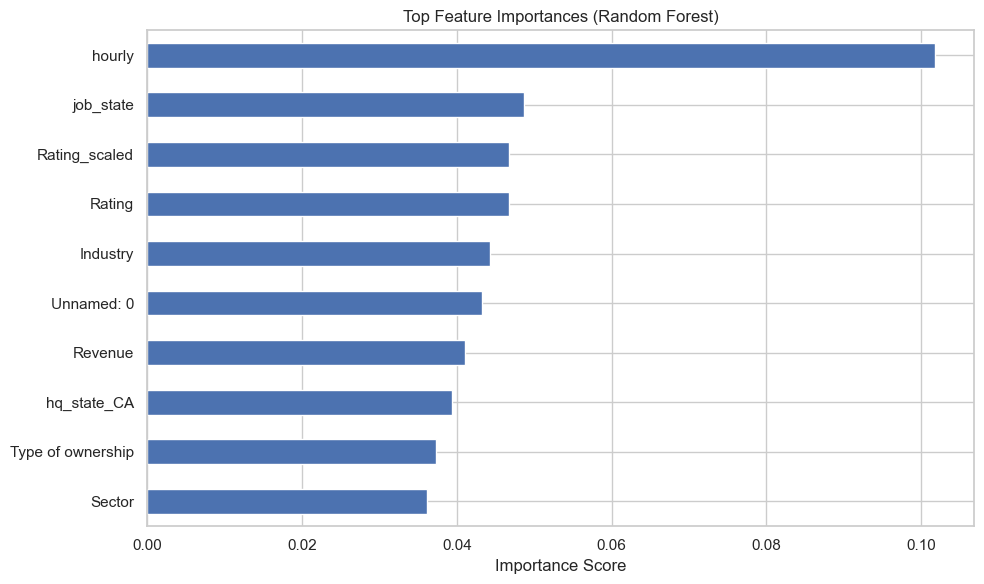

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# Getting feature importances from the trained model
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sorting and plotting the top 10
top_features = importances.sort_values().tail(10)
top_features.plot(kind='barh', figsize=(10, 6), title='Top Feature Importances (Random Forest)')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [65]:
#  Hyperparameter Tuning using Randomized Search 
#  To try and squeeze more accuracy out of Random Forest
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='r2'
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

# Evaluating the new best model
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Random Forest R²:", r2_score(y_test, y_pred_best))
print("Tuned Random Forest MSE:", mean_squared_error(y_test, y_pred_best))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Tuned Random Forest R²: 0.6345138151321748
Tuned Random Forest MSE: 465.6393614034543


In [66]:
# Now, as tuning reduced metrics, as clearly R2 is better and also MSE has significant difference over here
# so finalising the non-tuned randomforest model

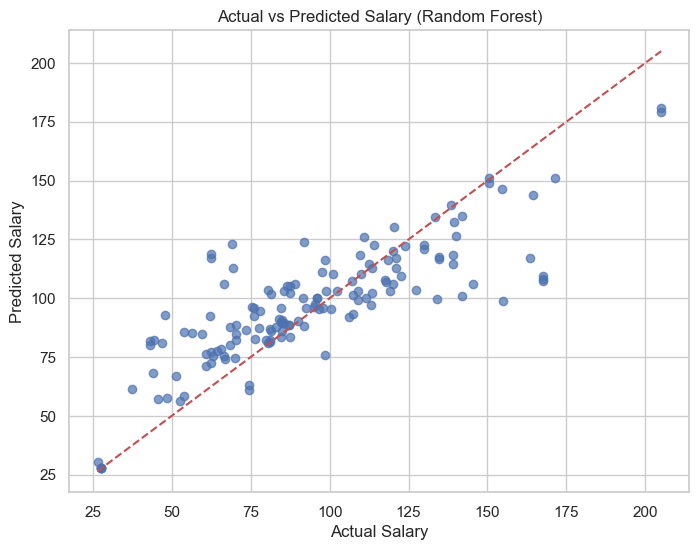

In [67]:
#  Plot: Actual vs Predicted
#  adding this to show prediction quality visually
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Random Forest)")
plt.grid(True)
plt.show()


In [68]:
# saving our non-tuned Random forest model for later use
import joblib
joblib.dump(rf, 'glassdoor_random_forest_salary_model.pkl')


['glassdoor_random_forest_salary_model.pkl']

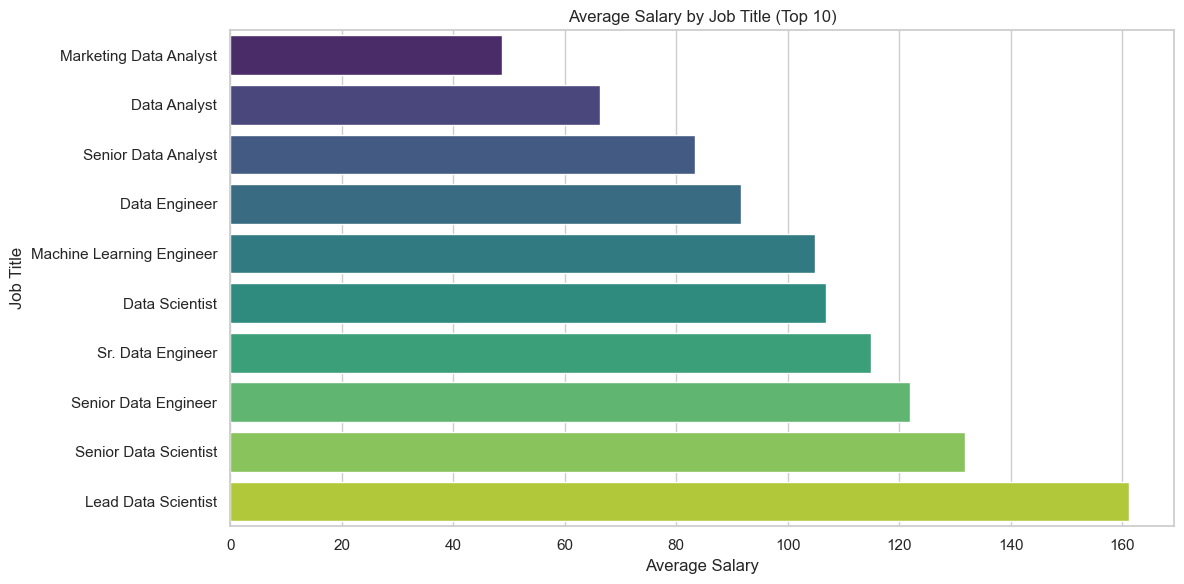

In [69]:
# Grouped Average Salary by Job Title (Top Roles)
# This analysis directly addresses Problem Statement Point 1 by showing how 
# grouped average salary levels vary with job title ( shows the top roles )

# Get the top 10 most frequent job titles
top_titles = df['Job Title'].value_counts().nlargest(10).index
filtered_df = df[df['Job Title'].isin(top_titles)]

# Calculate average salary for each title
avg_salary_by_title = filtered_df.groupby('Job Title')['avg_salary'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, palette='viridis')
plt.title('Average Salary by Job Title (Top 10)')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


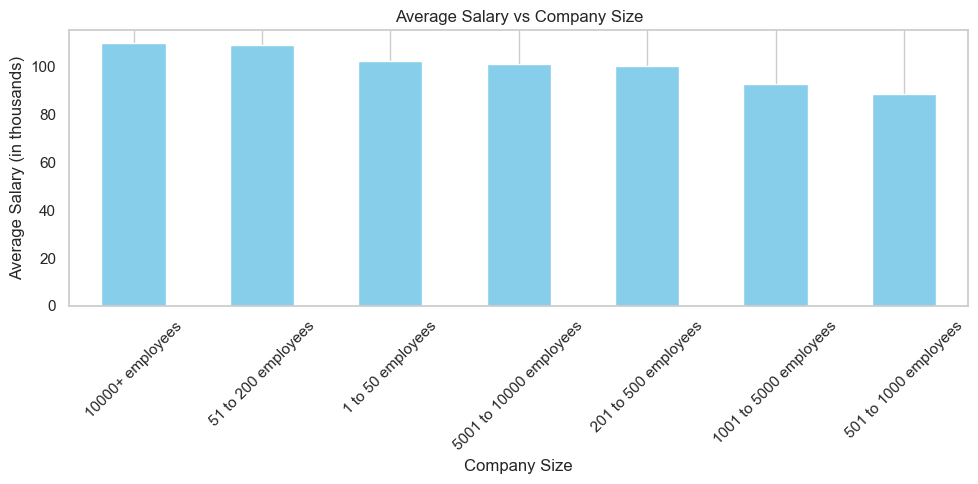

In [70]:
# To investigate how company size affects salary levels, we group the data by the Size column
# and compute the average salary across each group

# his analysis directly addresses Problem Statement Point 2 by showing 
# how average salary levels vary with company size. 
# We observe that both very small and very large companies offer relatively higher salaries, 
# while mid-sized companies (e.g., 501–1000) offer lower averages.

# filtering to avoid plotting 'unknown' or '-1' columns if any
filtered_df = df[~df['Size'].isin(['Unknown', '-1'])]

# Average salary by company size
filtered_df.groupby('Size')['avg_salary'].mean().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 5),
    color='skyblue'
)
plt.title('Average Salary vs Company Size')
plt.ylabel('Average Salary (in thousands)')
plt.xlabel('Company Size')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Conclusion
Throughout this project, we followed a structured machine learning pipeline:

- Cleaned and preprocessed the job dataset (handled nulls, removed outliers, encoded features, and scaled numerical values).
- Explored key patterns related to role, location, and company size.
- Trained multiple models including Linear Regression and Random Forest.
- Tuned hyperparameters and evaluated model performance using metrics like R² and MSE.
- Interpreted feature importances and assessed the business relevance of our predictors.

## Summary of findings:

- Role-based salary variation was visible through job titles (e.g., 'Data Scientist' roles had higher average salaries).
- Company size had a non-linear effect, with both small startups and large enterprises offering higher average salaries compared to mid-sized companies.
- Location clearly influenced pay, with certain states (like CA) associated with higher salaries.
- Our Random Forest model, even before tuning, achieved strong performance and captured these patterns well, making it suitable for predicting salary ranges based on job attributes.



# Next Steps & Recommendations
While the model and analysis provide solid insights, several enhancements can take this project further:

- ### Add NLP-based role classification:
    - Use NLP to cluster similar roles (e.g., "Data Engineer" vs "Big Data Engineer") for better generalization.
- ### Integrate cost of living data:
    - Adjust salary predictions based on city-specific living costs to provide more practical estimates.
- ### Deploy as a salary prediction app:
    - Wrap the trained model into a web-based tool where users can input job details and get a predicted salary.
- ### Explore additional models:
    - Try models like Gradient Boosting, XGBoost, or even explainable ML like SHAP to improve performance and transparency.
- ### Time-aware analysis:
    - If historical data becomes available, track salary trends over time for forecasting purposes.